In [1]:
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization
from spectral_cube import SpectralCube
import warnings
import pandas as pd

tbl = Table.read('table234.tex', format='latex')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
a = tbl["R.A."]

RA_offset = []
for i in a:
    d = i.replace("$-$", "-")
    RA_offset.append(float(d))

tbl["R.A."] = RA_offset

In [3]:
a = np.copy(tbl["R.A."])

In [4]:
b = tbl["decl."]

decl_offset = []
for i in b:
    d = i.replace("$-$", "-")
    decl_offset.append(float(d))

tbl["decl."] = decl_offset

In [5]:
b = np.copy(tbl["decl."])
coords = SkyCoord(a,b, unit='mas')

In [6]:
c = SkyCoord('19h23m40.05s', '+14d31m05.48s', frame='fk5')
c.ra

<Longitude 290.916875 deg>

In [7]:
def w51north_settings():

    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    #ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.display_minor_ticks(True)
    dec.display_minor_ticks(True)
    ra.ticklabels.set_fontsize(tick_fontsize)
    # ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    # dec.set_ticklabel(exclude_overlapping=True)
    # ra.set_ticks(spacing=5 * u.arcsec)
    # ra.set_ticks(number=7)
    
    return ax

In [8]:
fn = '/Users/galagabits/Developer/masers/W51/FITS/W51n_cont_briggsSC_tclean.image.fits'
fh = SpectralCube.read(fn, format='fits')
cen = fh.shape[1]/2, fh.shape[2]/2

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh[0].header)
    

In [9]:
v =fh[0].data

In [10]:
masers = pd.read_csv('water_masers_imai.csv')

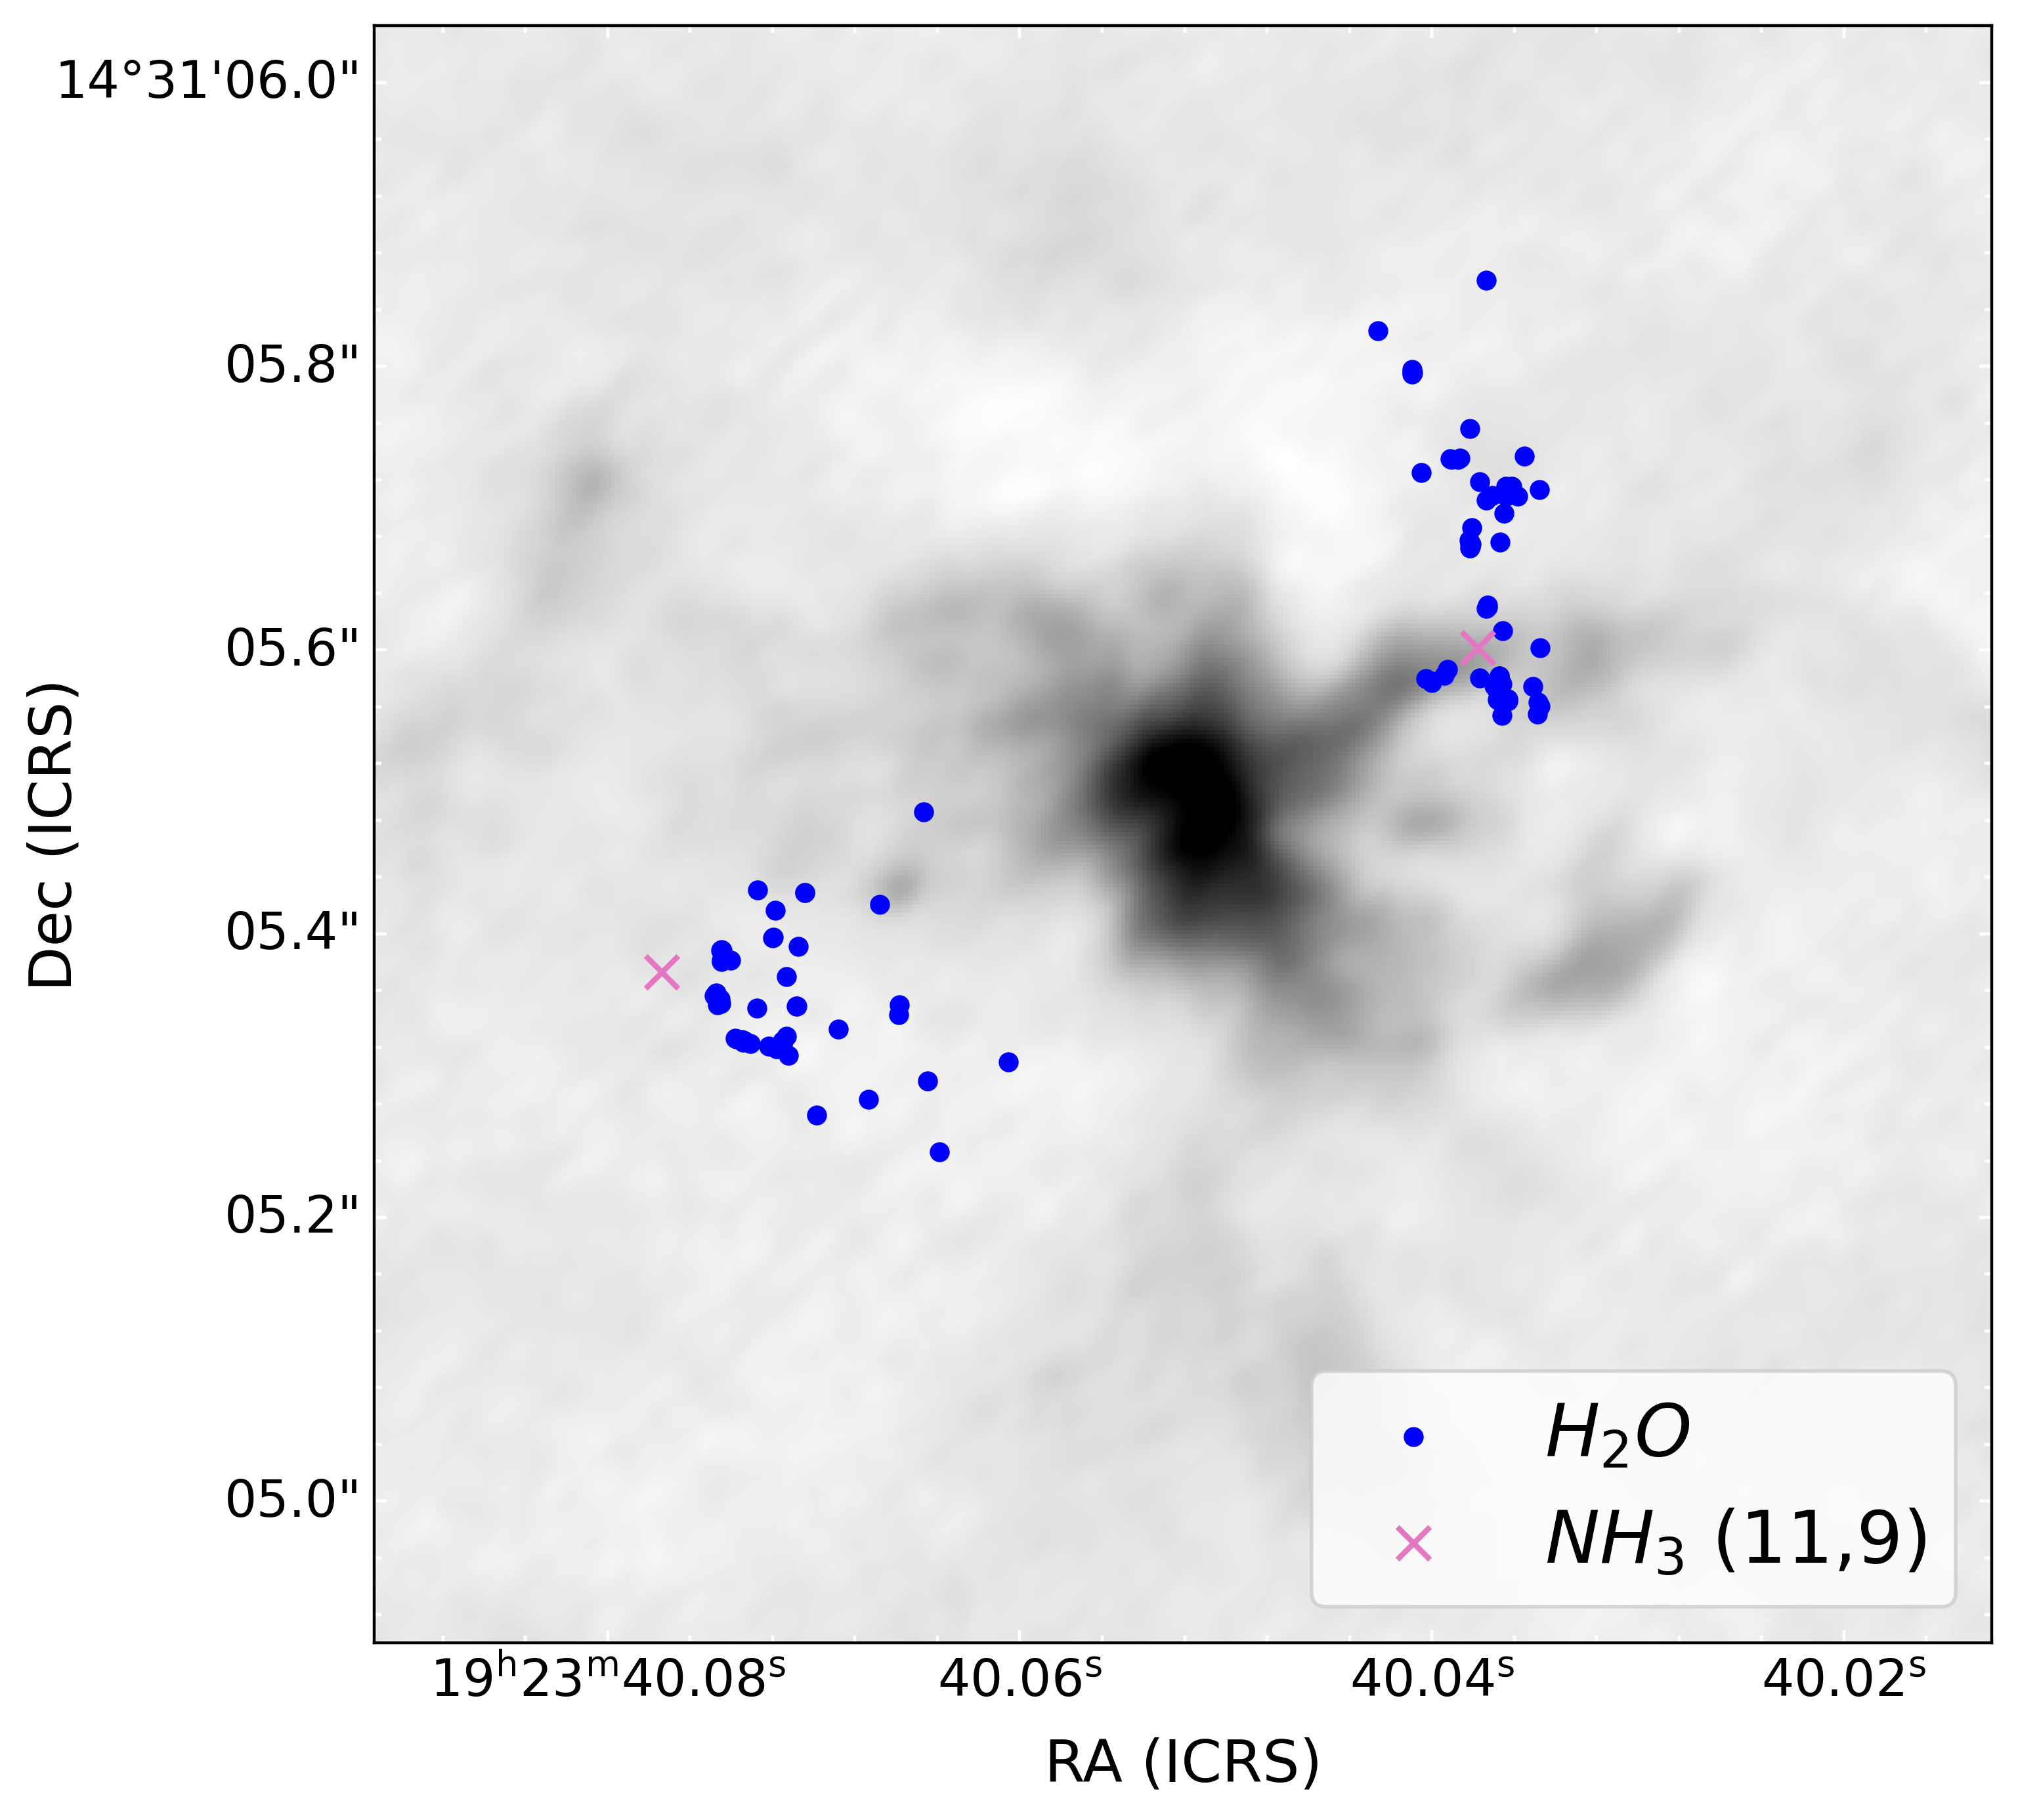

<Figure size 2560x1920 with 0 Axes>

In [28]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

plt.figure(figsize=(8,8))

ax = plt.subplot(projection=ww)


w51north_settings()

im = ax.imshow(v, cmap='gray_r', norm=visualization.simple_norm(fh[0].data, stretch='linear', max_percent=99.999))

ax.scatter(masers['ra'], masers['dec'], s=20, c = "blue", transform=ax.get_transform('world'), label = '$\t{H}_2\t{O}$')

ax.axis([cen[0]-200,cen[0]+180,cen[1]-200,cen[1]+180])
ax.scatter(290.916824, 14.51822272, s=80, c = "tab:pink", marker = 'x' ,transform=ax.get_transform('world'))
ax.scatter(290.9169891, 14.51815923, s=80, c = "tab:pink", marker = 'x' ,transform=ax.get_transform('world'),label = '$\t{NH}_3$ (11,9)')

ax.legend(loc = 4, fontsize=20)
ax.tick_params(axis="y",direction="in", color = 'white')
ax.tick_params(axis="x",direction="in",color = 'white')

plt.show()
plt.savefig('W51_North_watermasers.png')


In [23]:
ax.axis([cen[0]-180,cen[0]+20,cen[1]-40,cen[1]+160])
plt.show()

In [24]:
def markers_water_masers(F):
    F.show_markers(290.916963792, 14.5181465528, edgecolor="k", facecolor="w")
    F.show_markers(290.916966508, 14.5181659778, edgecolor="k", facecolor="w")
    F.show_markers(290.91696655, 14.5181658889, edgecolor="k", facecolor="w")
    F.show_markers(290.916940992, 14.5181527778, edgecolor="k", facecolor="w")
    F.show_markers(290.916961675, 14.5181525278, edgecolor="k", facecolor="w")
    F.show_markers(290.916961762, 14.5181524361, edgecolor="k", facecolor="w")
    F.show_markers(290.916975237, 14.5181614639, edgecolor="k", facecolor="w")
    F.show_markers(290.916978062, 14.5181549778, edgecolor="k", facecolor="w")
    F.show_markers(290.916976954, 14.5181614278, edgecolor="k", facecolor="w")
    F.show_markers(290.916976762, 14.51816345, edgecolor="k", facecolor="w")
    F.show_markers(290.916977033, 14.5181634917, edgecolor="k", facecolor="w")
    F.show_markers(290.916976983, 14.5181611778, edgecolor="k", facecolor="w")
    F.show_markers(290.916978096, 14.5181550833, edgecolor="k", facecolor="w")
    F.show_markers(290.916977054, 14.5181634167, edgecolor="k", facecolor="w")
    F.show_markers(290.916941171, 14.5181508111, edgecolor="k", facecolor="w")
    F.show_markers(290.916963862, 14.5181582333, edgecolor="k", facecolor="w")
    F.show_markers(290.916964637, 14.5181457111, edgecolor="k", facecolor="w")
    F.show_markers(290.916978383, 14.5181545222, edgecolor="k", facecolor="w")
    F.show_markers(290.916953404, 14.5181479472, edgecolor="k", facecolor="w")
    F.show_markers(290.916977187, 14.5181538889, edgecolor="k", facecolor="w")
    F.show_markers(290.916960129, 14.5181746667, edgecolor="k", facecolor="w")
    F.show_markers(290.916960179, 14.5181746917, edgecolor="k", facecolor="w")
    F.show_markers(290.916972342, 14.5181457222, edgecolor="k", facecolor="w")
    F.show_markers(290.916977137, 14.5181529722, edgecolor="k", facecolor="w")
    F.show_markers(290.916935321, 14.5181378361, edgecolor="k", facecolor="w")
    F.show_markers(290.916972358, 14.5181456806, edgecolor="k", facecolor="w")
    F.show_markers(290.9169473, 14.5181342278, edgecolor="k", facecolor="w")
    F.show_markers(290.916977792, 14.5181527139, edgecolor="k", facecolor="w")
    F.show_markers(290.917055208, 14.5179781722, edgecolor="k", facecolor="w")
    F.show_markers(290.916972358, 14.5181455972, edgecolor="k", facecolor="w")
    F.show_markers(290.916971067, 14.518145125, edgecolor="k", facecolor="w")
    F.show_markers(290.917055162, 14.5179783111, edgecolor="k", facecolor="w")
    F.show_markers(290.916932925, 14.5181239111, edgecolor="k", facecolor="w")
    F.show_markers(290.916972908, 14.5181459556, edgecolor="k", facecolor="w")
    F.show_markers(290.916972658, 14.5181456861, edgecolor="k", facecolor="w")
    F.show_markers(290.916972542, 14.51814565, edgecolor="k", facecolor="w")
    F.show_markers(290.916957721, 14.5181311667, edgecolor="k", facecolor="w")
    F.show_markers(290.917051208, 14.5179726694, edgecolor="k", facecolor="w")
    F.show_markers(290.91681285, 14.5182150917, edgecolor="k", facecolor="w")
    F.show_markers(290.916811529, 14.5182226083, edgecolor="k", facecolor="w")
    F.show_markers(290.916823642, 14.5182552333, edgecolor="k", facecolor="w")
    F.show_markers(290.916965875, 14.5181441611, edgecolor="k", facecolor="w")
    F.show_markers(290.916811371, 14.5182112694, edgecolor="k", facecolor="w")
    F.show_markers(290.916972592, 14.5181454694, edgecolor="k", facecolor="w")
    F.show_markers(290.916963529, 14.5181428111, edgecolor="k", facecolor="w")
    F.show_markers(290.916945008, 14.5181724278, edgecolor="k", facecolor="w")
    F.show_markers(290.916811767, 14.5182119694, edgecolor="k", facecolor="w")
    F.show_markers(290.916811996, 14.5182096583, edgecolor="k", facecolor="w")
    F.show_markers(290.916967496, 14.5181446889, edgecolor="k", facecolor="w")
    F.show_markers(290.917146154, 14.5182584361, edgecolor="k", facecolor="w")
    F.show_markers(290.916974171, 14.518146225, edgecolor="k", facecolor="w")
    F.show_markers(290.916964637, 14.5181448333, edgecolor="k", facecolor="w")
    F.show_markers(290.917122396, 14.5180492306, edgecolor="k", facecolor="w")
    F.show_markers(290.916837287, 14.5182766972, edgecolor="k", facecolor="w")
    F.show_markers(290.916969692, 14.5181752111, edgecolor="k", facecolor="w")
    F.show_markers(290.917185958, 14.5183399028, edgecolor="k", facecolor="w")
    F.show_markers(290.916969821, 14.5181521028, edgecolor="k", facecolor="w")
    F.show_markers(290.916822346, 14.5182945944, edgecolor="k", facecolor="w")
    F.show_markers(290.916825304, 14.5182461778, edgecolor="k", facecolor="w")
    F.show_markers(290.916837433, 14.5182762222, edgecolor="k", facecolor="w")
    F.show_markers(290.9168372, 14.5182764528, edgecolor="k", facecolor="w")
    F.show_markers(290.916837317, 14.5182771361, edgecolor="k", facecolor="w")
    F.show_markers(290.917110233, 14.5179833278, edgecolor="k", facecolor="w")
    F.show_markers(290.9168442, 14.5182846833, edgecolor="k", facecolor="w")
    F.show_markers(290.916811596, 14.5182535833, edgecolor="k", facecolor="w")
    F.show_markers(290.916791475, 14.5179663194, edgecolor="k", facecolor="w")
    F.show_markers(290.915965229, 14.5181872278, edgecolor="k", facecolor="w")
    F.show_markers(290.915964792, 14.5181874972, edgecolor="k", facecolor="w")
    F.show_markers(290.916961362, 14.5181641361, edgecolor="k", facecolor="w")
    F.show_markers(290.916966121, 14.5181712472, edgecolor="k", facecolor="w")
    F.show_markers(290.916814579, 14.5182601667, edgecolor="k", facecolor="w")
    F.show_markers(290.917180521, 14.5183418444, edgecolor="k", facecolor="w")
    F.show_markers(290.916973921, 14.5181460972, edgecolor="k", facecolor="w")
    F.show_markers(290.916822429, 14.5182516111, edgecolor="k", facecolor="w")
    F.show_markers(290.917178783, 14.5183427944, edgecolor="k", facecolor="w")
    F.show_markers(290.916825746, 14.5182421889, edgecolor="k", facecolor="w")
    F.show_markers(290.917180658, 14.5183417444, edgecolor="k", facecolor="w")
    F.show_markers(290.916818279, 14.5182523583, edgecolor="k", facecolor="w")
    F.show_markers(290.917187125, 14.5183249056, edgecolor="k", facecolor="w")
    F.show_markers(290.916835496, 14.5182569972, edgecolor="k", facecolor="w")
    F.show_markers(290.916829633, 14.5182597194, edgecolor="k", facecolor="w")
    F.show_markers(290.9168257, 14.5182655333, edgecolor="k", facecolor="w")
    F.show_markers(290.916819579, 14.5182432972, edgecolor="k", facecolor="w")
    F.show_markers(290.916936092, 14.5181905944, edgecolor="k", facecolor="w")
    F.show_markers(290.916818662, 14.5182490639, edgecolor="k", facecolor="w")
    F.show_markers(290.916818071, 14.518254075, edgecolor="k", facecolor="w")
    F.show_markers(290.916825567, 14.5182429222, edgecolor="k", facecolor="w")
    F.show_markers(290.916825817, 14.5182437889, edgecolor="k", facecolor="w")
    F.show_markers(290.916817221, 14.518254325, edgecolor="k", facecolor="w")
    F.show_markers(290.916829375, 14.5182595778, edgecolor="k", facecolor="w")
    F.show_markers(290.916827746, 14.5182598028, edgecolor="k", facecolor="w")
    F.show_markers(290.916818412, 14.5182542889, edgecolor="k", facecolor="w")
    F.show_markers(290.916822292, 14.5182304194, edgecolor="k", facecolor="w")
    F.show_markers(290.916828012, 14.5182594972, edgecolor="k", facecolor="w")
    F.show_markers(290.916825371, 14.5182429333, edgecolor="k", facecolor="w")
    F.show_markers(290.916816042, 14.5182522944, edgecolor="k", facecolor="w")
    F.show_markers(290.916825471, 14.5182425056, edgecolor="k", facecolor="w")
    F.show_markers(290.916819696, 14.5182171639, edgecolor="k", facecolor="w")
    F.show_markers(290.916821096, 14.5182524833, edgecolor="k", facecolor="w")
    F.show_markers(290.916822146, 14.5182306833, edgecolor="k", facecolor="w")
    F.show_markers(290.916819654, 14.5182171361, edgecolor="k", facecolor="w")
    F.show_markers(290.916822079, 14.5182310306, edgecolor="k", facecolor="w")
    F.show_markers(290.916819217, 14.5182155556, edgecolor="k", facecolor="w")
    F.show_markers(290.916819658, 14.5182169528, edgecolor="k", facecolor="w")
    F.show_markers(290.916819079, 14.5182094056, edgecolor="k", facecolor="w")
    F.show_markers(290.91691895, 14.5181415833, edgecolor="k", facecolor="w")
    F.show_markers(290.916820729, 14.5182152694, edgecolor="k", facecolor="w")
    F.show_markers(290.916818983, 14.5182260028, edgecolor="k", facecolor="w")
    F.show_markers(290.916817954, 14.5182122639, edgecolor="k", facecolor="w")
    F.show_markers(290.916817954, 14.5182126889, edgecolor="k", facecolor="w")
    F.show_markers(290.916834596, 14.5182165972, edgecolor="k", facecolor="w")
    F.show_markers(290.916823637, 14.5182167806, edgecolor="k", facecolor="w")
    F.show_markers(290.916819471, 14.5182124639, edgecolor="k", facecolor="w")
    F.show_markers(290.916833792, 14.5182162528, edgecolor="k", facecolor="w")
    F.show_markers(290.916820146, 14.5182147028, edgecolor="k", facecolor="w")
    F.show_markers(290.916830237, 14.5182183917, edgecolor="k", facecolor="w")
    F.show_markers(290.916820221, 14.5182144611, edgecolor="k", facecolor="w")
    F.show_markers(290.916830842, 14.5182172889, edgecolor="k", facecolor="w")
    F.show_markers(290.916833387, 14.5182158917, edgecolor="k", facecolor="w")
    F.show_markers(290.916818787, 14.5182125083, edgecolor="k", facecolor="w")
    F.show_markers(290.916820329, 14.51821485, edgecolor="k", facecolor="w")
    F.show_markers(290.916819633, 14.5182130028, edgecolor="k", facecolor="w")
    F.show_markers(290.916820146, 14.5182124806, edgecolor="k", facecolor="w")

    return

In [25]:
masers = pd.read_csv('water_masers_imai.csv')

In [26]:
SkyCoord(masers['ra'], masers['dec'], frame='fk5')

UnitTypeError: Angle instances require units equivalent to 'rad', but no unit was given.

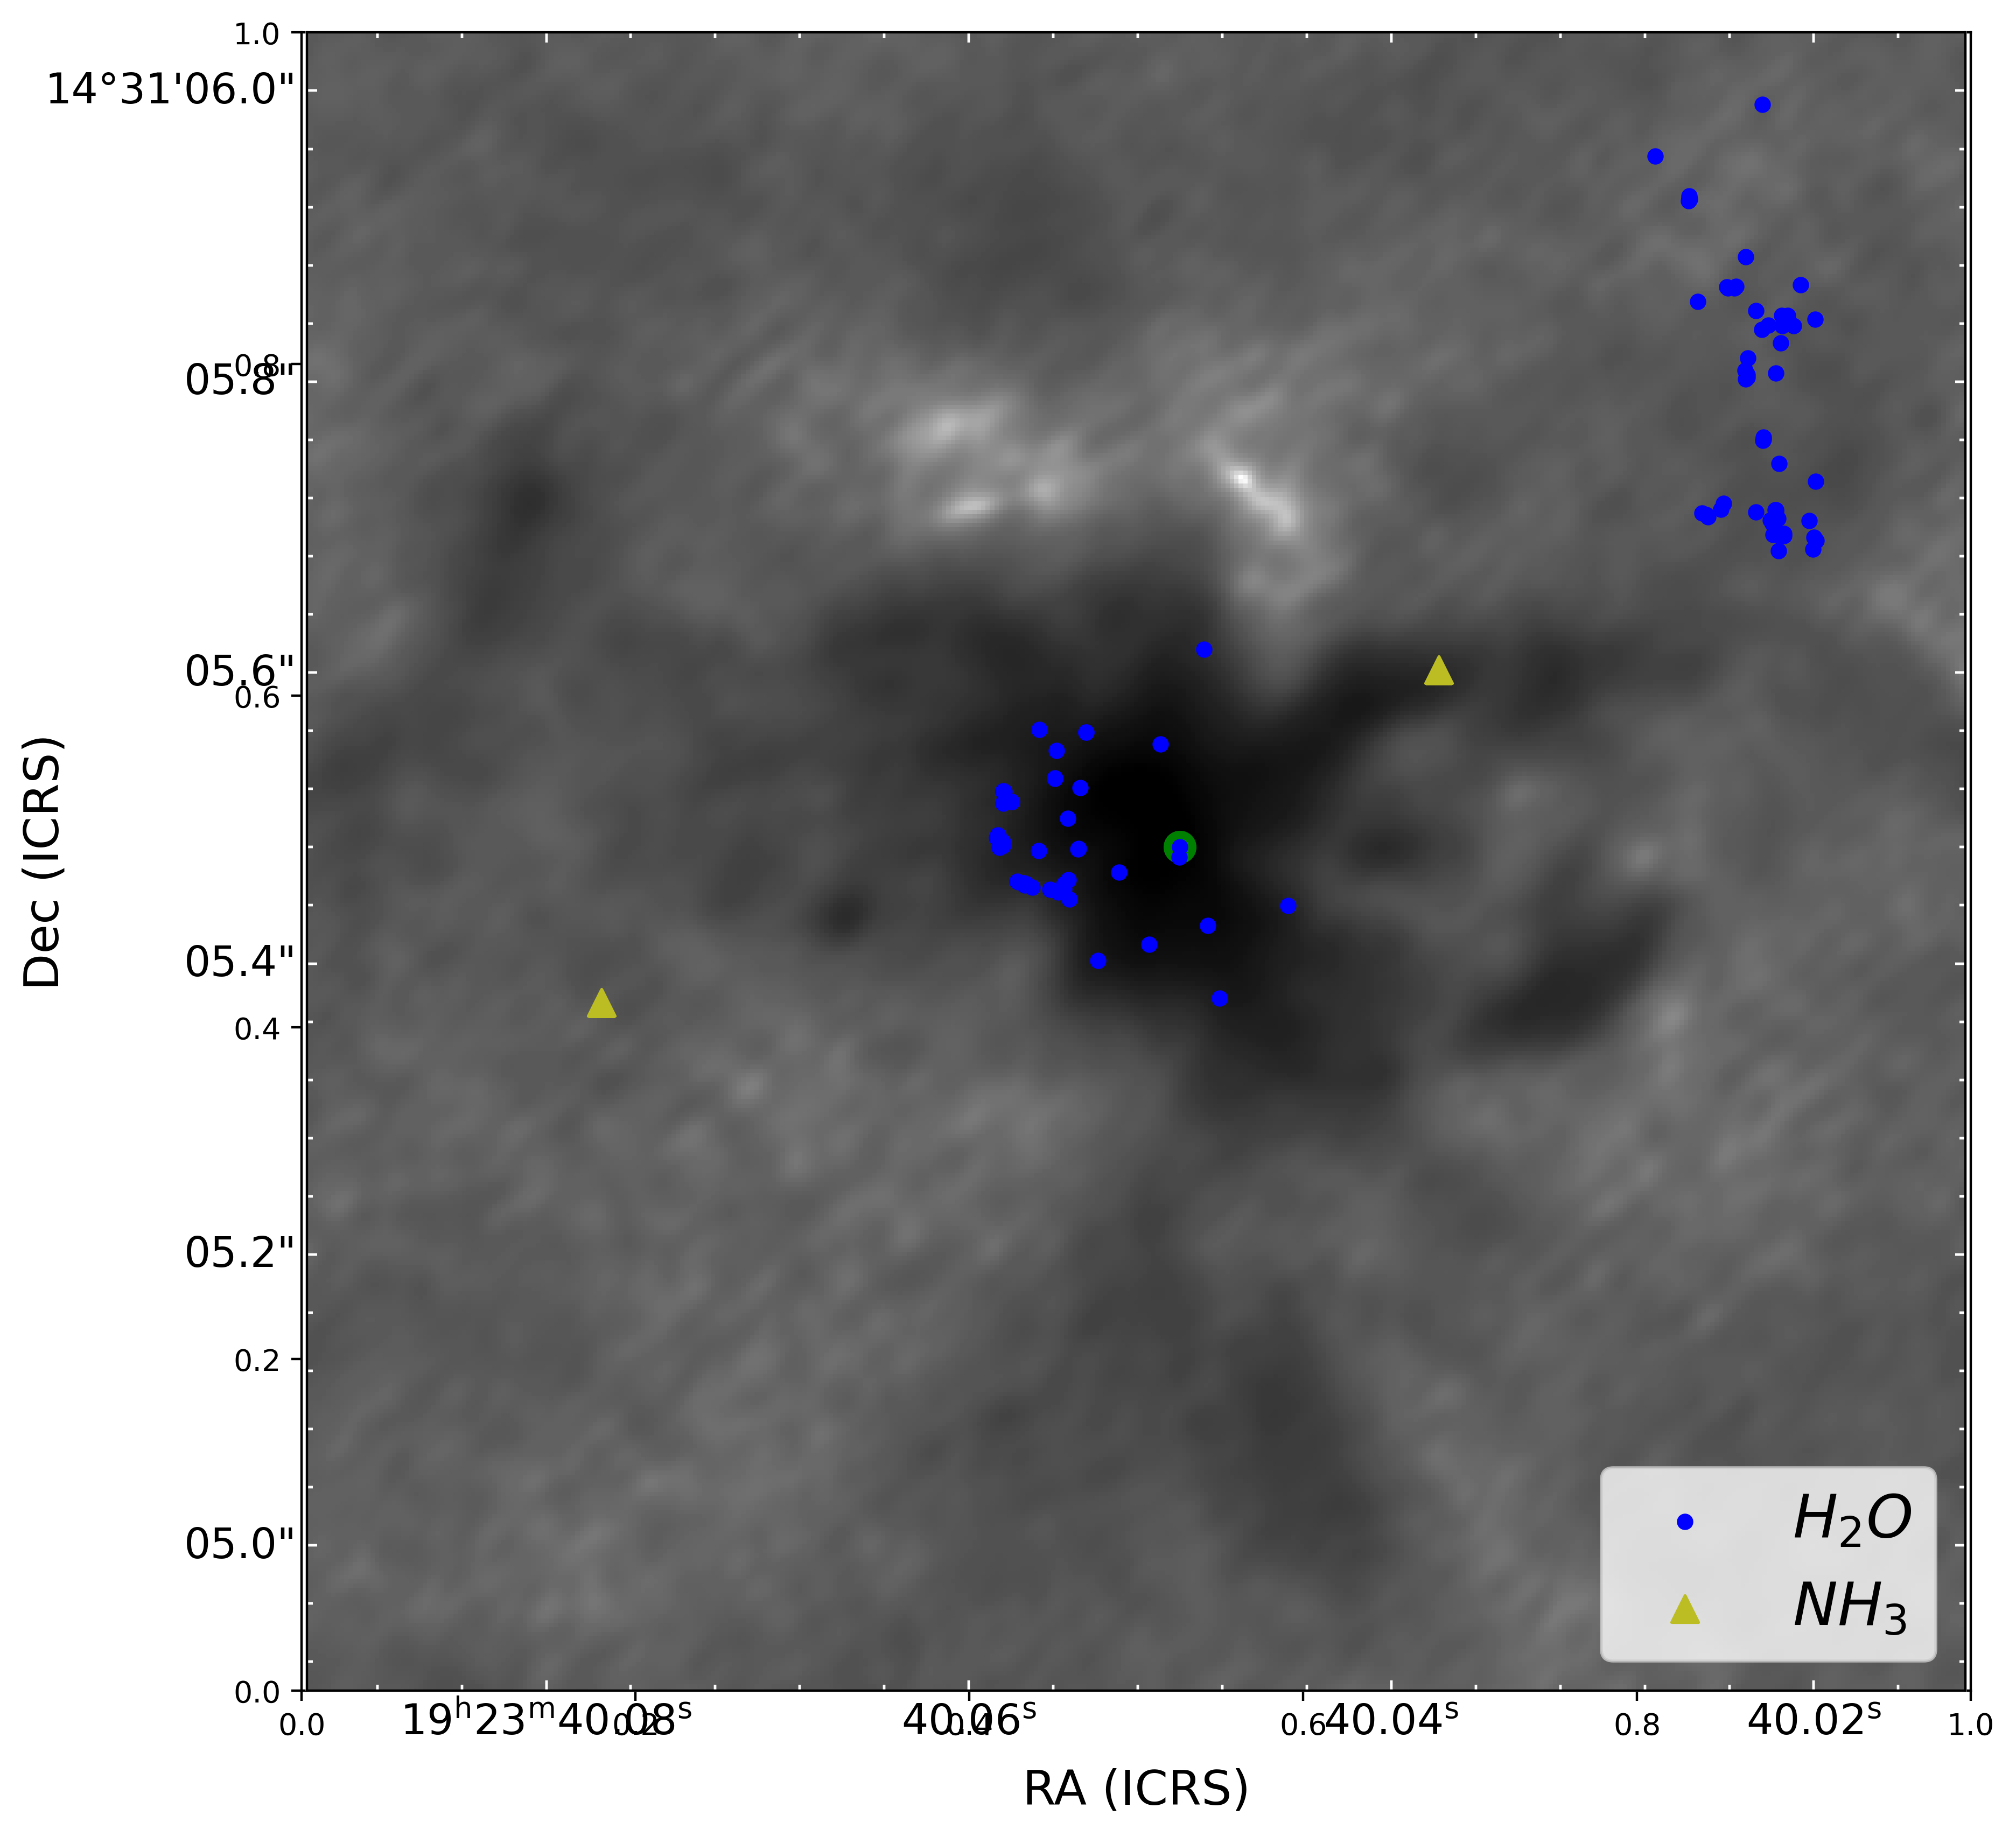

In [27]:

plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

fig, ax = plt.subplots(figsize=(10,10))

ax = pl.subplot(projection=ww)
w51north_settings()

im = ax.imshow(v, cmap='gray_r', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=99.9995))

ax.scatter(c.ra.deg, c.dec.deg, s=100, c = "green", transform=ax.get_transform('world'))
ax.scatter(c.ra.deg + coords.ra.deg, c.dec.deg + coords.dec.deg , s=20, c = "blue", transform=ax.get_transform('world'), label = '$\t{H}_2\t{O}$')

ax.axis([cen[0]-200,cen[0]+180,cen[1]-200,cen[1]+180])
ax.scatter(290.916824, 14.51822272, s=80, c = "tab:olive", marker = '^' ,transform=ax.get_transform('world'))
ax.scatter(290.9169891, 14.51815923, s=80, c = "tab:olive", marker = '^' ,transform=ax.get_transform('world'),label = '$\t{NH}_3$')

ax.legend(loc = 4, fontsize=20)
ax.tick_params(axis="y",direction="in", color = 'white')
ax.tick_params(axis="x",direction="in",color = 'white')
plt.show()


In [49]:
pwd

'/Users/galagabits/Developer/masers/W51/W51-Masers-and-Starforming-Regions/notebooks'